<a href="https://colab.research.google.com/github/SarahSouzaPontes/-superheropowers/blob/main/desafioAlelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Instalação das bibliotecas importantes
'''
!pip install pandas -q
!pip install numpy -q
!pip uninstall pandas-profiling -y -q
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q


In [203]:
'''
Importação dos módulos e funções
'''

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import warnings
import seaborn as sns
import imblearn
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
import missingno as msno
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()


In [144]:
'''
Carregando os arquivos .csv como panda dataframe
'''

super_heros = "/content/heroes_information.csv"
super_heros_powers = "/content/super_hero_powers.csv"
df_super_heros = pd.read_csv(super_heros)
df_super_heros_powers = pd.read_csv(super_heros_powers)


In [145]:
'''
Verificando a tabela de informações dos super herois  
'''
df_super_heros.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [146]:
'''
Removendo a coluna com os id's 
'''
df_super_heros.drop('Unnamed: 0', axis=1, inplace=True)
df_super_heros.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [147]:
'''
Verificando se existem super herois duplicados na tabela de informações
'''
df_super_heros[df_super_heros.duplicated(['name'], keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
47,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
49,Atom,Male,blue,-,Red,178.0,DC Comics,-,good,68.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
62,Batgirl,Female,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
68,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0


In [148]:
'''
Removendo os super herois duplicados, com o mesmo nome e a mesma editora 
'''
df_super_heros.drop_duplicates(['name', 'Publisher'], keep=False, inplace=True)

### Primeiro, queremos agrupar nossos super-heróis de acordo com seus poderes e informações.
Execute um método de cluster não supervisionado usando o número de clusters que você
julgar mais apropriado.

1. Qual algoritmo você escolheu e por quê?
2. Quais recursos você usou e por quê? Explique qualquer pré-processamento ou engenharia
de recursos (seleção) que você executou.

In [149]:
'''
Verificando os dados na tabela de poder dos super herois
'''
df_super_heros_powers.head()



,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [150]:
'''
Inspecionando por nomes duplicados
'''
df_super_heros_powers[df_super_heros_powers.duplicated(['hero_names'], keep=False)]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


In [154]:
'''
Renomeando a coluna hero_names --> name para igualar com a tabela de informações 
'''
df_super_heros_powers.rename(columns={"hero_names":"name"}, inplace=True)

In [155]:
'''
Fundindo(merge) dos dois dataframes e substituição dos valores faltantes ou incoerentes para NaN
'''

df_heros_all = pd.merge(df_super_heros, df_super_heros_powers, on="name")
df_heros_all['Weight'].replace(-99.0, np.nan, inplace=True)
df_heros_all['Height'].replace(-99.0, np.nan, inplace=True)
df_heros_all.replace('-', np.nan,inplace=True)


In [156]:
''' Inspecionando por nomes duplicados '''

df_heros_all[df_heros_all.duplicated(['name'], keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
20,Angel,Male,blue,NaN,Blond,183.0,Marvel Comics,NaN,good,68.0,...,False,False,False,False,False,False,False,False,False,False
21,Angel,Male,NaN,Vampire,NaN,NaN,Dark Horse Comics,NaN,good,NaN,...,False,False,False,False,False,False,False,False,False,False
44,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,NaN,good,101.0,...,False,False,False,False,False,False,False,False,False,False
45,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,NaN,bad,126.0,...,False,False,False,False,False,False,False,False,False,False
129,Captain Marvel,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,NaN,good,74.0,...,False,False,False,False,False,False,False,False,False,False
130,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,NaN,good,101.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
list(df_heros_all.columns)

In [ ]:
df_heros_all['name']

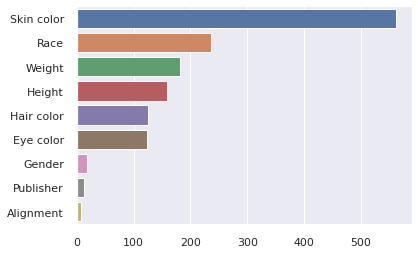

In [157]:
''' Verificando as colunas que mais possuem valores NaN '''
X=df_heros_all.isna().sum().sort_values(ascending=False)
drop_list = []
for i in range(0,(len(X))):
  if (X[i] == 0):
    drop_list.append(X.index[i])
X.drop(labels=drop_list, inplace=True)
sns.barplot(y=X.index,x=X.values,order=X.index)

In [158]:
''' Removendo as colunas que mais possuem valores NaN '''
df_heros_all.drop(labels=['Skin color', 'Race', 'Hair color', 'Eye color'], axis=1, inplace=True)


In [159]:
'''Limpando os dados removendo as linhas que possuem valores NaN e resetando o index'''
df_heros_all.dropna(inplace=True)
df_heros_all.reset_index(inplace=True)
df_heros_all.drop(labels=['index'], axis=1, inplace=True)
df_heros_all

,name,Gender,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,203.0,Marvel Comics,good,441.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,191.0,Dark Horse Comics,good,65.0,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,185.0,DC Comics,good,90.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,203.0,Marvel Comics,bad,441.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Male,193.0,Marvel Comics,bad,122.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,Yellowjacket,Male,183.0,Marvel Comics,good,83.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
432,Yellowjacket II,Female,165.0,Marvel Comics,good,52.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
433,Yoda,Male,66.0,George Lucas,good,17.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
434,Zatanna,Female,170.0,DC Comics,good,57.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Um dos desafios do clustering é definir o número certo de clusters. Como você escolheu esse número? Como você avalia a qualidade dos clusters finais?

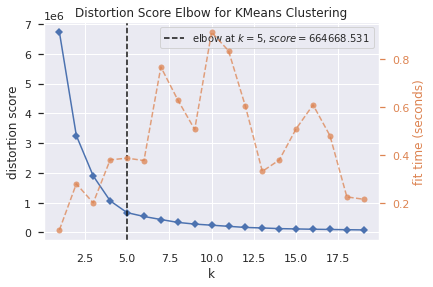

In [177]:

'''Escolhendo o k mais apropriado pela técnica de Elbow'''
X = pd.get_dummies(df_heros_all.drop('name', axis=1))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),timings=True)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [178]:
'''Gerando o modelo com o k definido anteriormente e agrupando-os'''
model = KMeans(n_clusters=5).fit(X)
pred = model.labels_
clusters = model.fit_predict(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 436 samples in 0.001s...
[t-SNE] Computed neighbors for 436 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 436 / 436
[t-SNE] Mean sigma: 4.025420
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.846664
[t-SNE] KL divergence after 1000 iterations: 0.253930


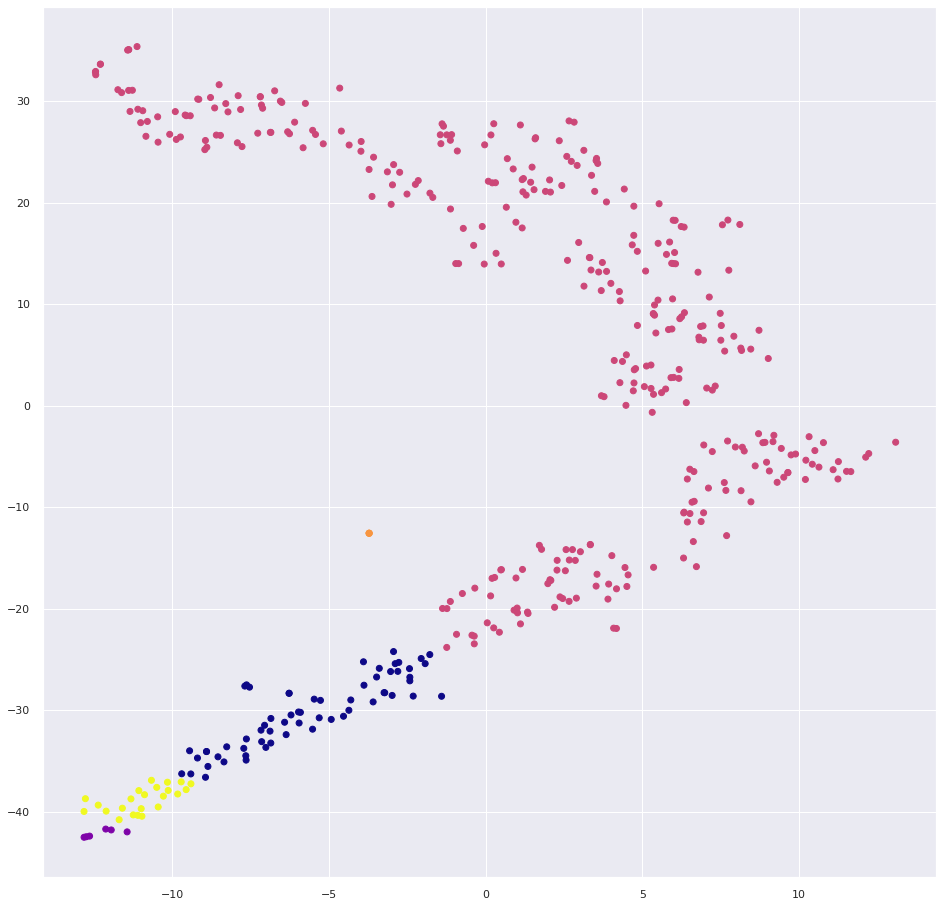

In [181]:
'''Visualizando a clusterização'''
np.random.seed(1)
tsne_clusters=TSNE(perplexity=30, verbose=1)
tsne_results=tsne_clusters.fit_transform(pd.get_dummies(df_heros_all.drop('name', axis=1)))
plt.figure(figsize=(16,16))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=pred, cmap='plasma')

In [169]:
'''Inserindo o agrupamento na tabela'''
df_heros_all['Cluster'] = clusters

In [182]:
df_heros_all.head()

,name,Gender,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Cluster
0,A-Bomb,Male,203.0,Marvel Comics,good,441.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,3
1,Abe Sapien,Male,191.0,Dark Horse Comics,good,65.0,True,True,False,False,...,False,False,False,False,False,False,False,False,False,2
2,Abin Sur,Male,185.0,DC Comics,good,90.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2
3,Abomination,Male,203.0,Marvel Comics,bad,441.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,3
4,Absorbing Man,Male,193.0,Marvel Comics,bad,122.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2


In [183]:
list(df_heros_all.columns[:9])

['name',
 'Gender',
 'Height',
 'Publisher',
 'Alignment',
 'Weight',
 'Agility',
 'Accelerated Healing',
 'Lantern Power Ring']

In [184]:
'''Exibindo as principais caracteristicas dos agrupamentos em termos de super poder'''

for i in range(df_heros_all['Cluster'].nunique()):
    print("Cluster no: {}".format(i))
    
    group_members= df_heros_all[df_heros_all['Cluster']==i]
    group_members_count = df_heros_all[df_heros_all['Cluster']==i].count()[0]
    
    print("Representatives: ", end=' ')
    
    reprs_count=5
    if group_members_count < 5:
        reprs_count = group_members_count
        
    for j in range(reprs_count):
        print(group_members.iloc[j]['name'], end='; ')
    print('')
    super_powers = df_heros_all[df_heros_all['Cluster']==i].drop(['name',
 'Gender',
 'Height',
 'Publisher',
 'Alignment',
 'Weight','Cluster'],axis=1).sum().to_dict()
    super_powers = sorted(super_powers.items(), key=lambda x:x[1], reverse=True)
    
    print('Most common skills with percentage of occurance:')
    for super_power in super_powers[:10]:
      print(super_power[0] + ' --> ' + format((super_power[1]/group_members_count), '.0%'))
    print('##############################################################################')

Cluster no: 0
Representatives:  Alien; Amazo; Apocalypse; Aquaman; Ares; 
Most common skills with percentage of occurance:
Super Strength --> 98%
Durability --> 83%
Stamina --> 75%
Super Speed --> 65%
Reflexes --> 47%
Agility --> 45%
Accelerated Healing --> 42%
Invulnerability --> 38%
Longevity --> 35%
Flight --> 32%
##############################################################################
Cluster no: 1
Representatives:  Darkseid; Giganta; Hulk; Juggernaut; Red Hulk; 
Most common skills with percentage of occurance:
Super Strength --> 100%
Durability --> 83%
Stamina --> 83%
Accelerated Healing --> 67%
Super Speed --> 67%
Toxin and Disease Resistance --> 67%
Agility --> 50%
Jump --> 50%
Invulnerability --> 50%
Longevity --> 33%
##############################################################################
Cluster no: 2
Representatives:  Abe Sapien; Abin Sur; Absorbing Man; Adam Strange; Agent Bob; 
Most common skills with percentage of occurance:
Super Strength --> 49%
Stamina --> 

Primeiro, usaremos o algoritmo Naive Bayes. Execute o algoritmo nos dados dos super-heróis
para prever a variável de alinhamento e avaliar os resultados. Novamente, detalhe qualquer
pré-processamento e engenharia de recursos que você aplicou no processo.

1. Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?
2. Como as características específicas deste conjunto de dados influenciam suas escolhas e
resultados de modelagem?
3. Como você avalia os resultados?

In [185]:
'''Reduzindo a tabela '''
df_heros_compact_NB = df_heros_all.loc[:, df_heros_all.columns.isin(['name','Gender','Height','Weight','Alignment'])]
df_heros_compact_NB.describe()

,Height,Weight
count,436.000000,436.00000
mean,188.024541,113.56422
std,62.114629,107.64859
min,15.200000,4.00000
25%,174.500000,61.00000
50%,183.000000,81.00000
75%,191.000000,106.00000
max,975.000000,900.00000


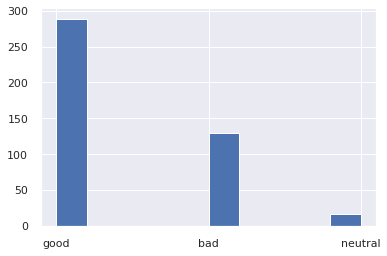

In [186]:
'''Distribuição entre bom, mal e neutro'''
df_heros_compact_NB.Alignment.hist()

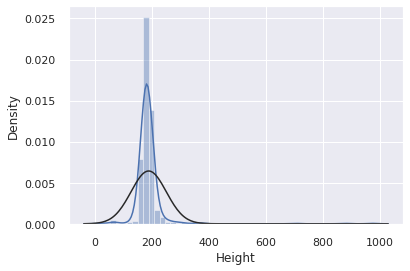

In [187]:
'''Distribuição normalizada de Altura'''
sns.distplot(df_heros_compact_NB.Height, fit = stats.norm);

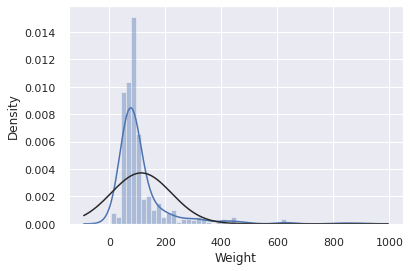

In [188]:
'''Distribuição normalizada de Peso'''
sns.distplot(df_heros_compact_NB.Weight, fit = stats.norm);

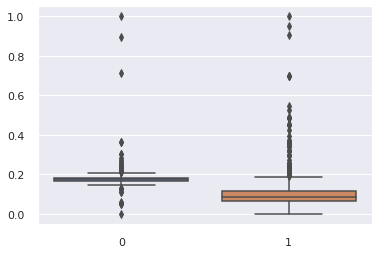

In [189]:
''' Box plot de altura e peso 
 normalizados '''
X = df_heros_compact_NB.loc[:, df_heros_compact_NB.columns.isin(['Height','Weight'])]
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)
sns.boxplot(data = rescaledX, orient = "v")

In [190]:
''' Modelo NB gaussiano com dados desbalanceados'''

gnb = GaussianNB()
kfold = KFold(n_splits = 10, shuffle=True, random_state=1)
resultado = cross_val_score(gnb, rescaledX, df_heros_compact_NB.Alignment, cv = kfold)
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 66.062


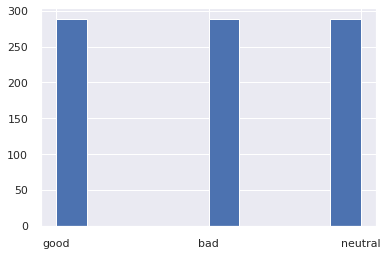

In [240]:
''' Balanceando os dados '''
oversample = imblearn.over_sampling.SMOTE()
X_res, y_res = oversample.fit_resample(df_heros_compact_NB.loc[:, df_heros_compact_NB.columns.isin(['Height','Weight'])], df_heros_compact_NB.Alignment )
y_res.hist()

In [192]:
''' Modelo NB gaussiano com dados balanceados'''

gnb = GaussianNB()
kfold = KFold(n_splits = 10, shuffle=True, random_state=1 )
resultado = cross_val_score(gnb, X_res, y_res, cv = kfold, scoring = 'accuracy')
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 36.103


Agora sinta-se à vontade para executar o algoritmo de classificação que julgar mais adequado
para essa tarefa.

1. O que motivou sua escolha do algoritmo?
2. Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da
modelagem?

LR: 0.403555 (0.047747)
LDA: 0.405881 (0.039305)
NB: 0.362149 (0.050304)
KNN: 0.577854 (0.048129)
CART: 0.626330 (0.030611)
SVM: 0.483213 (0.057275)
RNN: 0.449666 (0.068834)


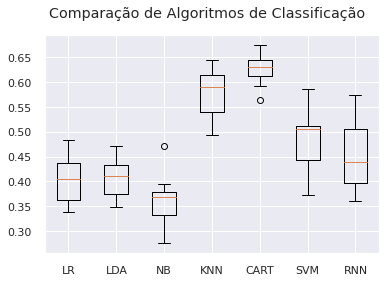

In [241]:
'''Análise de varios algoritmos de classificação'''
um_folds = 10
resultados = []
nomes = []
modelos = []

modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('RNN',MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)))

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, shuffle=True, random_state=1)
    cv_results = cross_val_score(modelo, X_res, y_res, cv = kfold, scoring = 'accuracy')
    cm_results = cross_val_predict(modelo,X_res,y_res,cv = kfold)
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Além do bem e do mal

Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos.

Qual algoritmo você escolheu e por quê? 
Como você avalia o desempenho do seu algoritmo neste caso? 

In [243]:
'''Regressão Linear Multipla '''
Male = 0
Female = 1
df_heros_compact_NB['Gender'].replace('Male', Male, inplace=True)
df_heros_compact_NB['Gender'].replace('Female', Female, inplace=True)

X = df_heros_compact_NB.loc[:, df_heros_compact_NB.columns.isin(['Height','Gender'])]
Y = df_heros_compact_NB.loc[:, df_heros_compact_NB.columns.isin(['Weight'])]


In [244]:
modelo2 = sm.OLS(Y,X).fit()
modelo2.summary(title='Sumário do modelo sem intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Sumário do modelo sem intercepto                           
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.538
Model:                            OLS   Adj. R-squared (uncentered):              0.536
Method:                 Least Squares   F-statistic:                              252.9
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                    1.51e-73
Time:                        20:29:17   Log-Likelihood:                         -2653.0
No. Observations:                 436   AIC:                                      5310.
Df Residuals:                     434   BIC:                                      5318.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender       -26.0832     10.680     -2.442      0.015     -47.073      -5.093
Height         0.6103      0.029     20.803      0.000       0.553       0.668
==============================================================================
Omnibus:                      293.309   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6839.091
Skew:                           2.492   Prob(JB):                         0.00
Kurtosis:                      21.752   Cond. No.                         415.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se você gostou de brincar com o conjunto de dados de super-heróis, esta seção é para você
mostrar quaisquer outros aspectos dos dados que não exploramos nas perguntas. Como uma
seção de bônus, isso é totalmente opcional, mas adoraríamos ver os insights que você pode
obter desses dados.

In [245]:
profile = ProfileReport(df_heros_all, title = "Relatório", html = {"style":{"full_width": True}})
profile.to_file(output_file = "/content/Relatório Base de Dados HTML")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]